In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- name - описание квартиры 
- host_id - идентификатор сдающего квартиру 
- host_name - имя того, кто сдает квартиру
- neighbourhood_group - район 
- latitude/longitude - точные координаты нахождения
- room_type - тип квартиры\комнаты и пр. 
- price - цена за сутки
- minimum_nights - минимальное количество дней для борнирования 
- number_of_reviews - количество просмотров объявления 
- last_review - последний просмотр...? 
- reviews_per_month - просмотров за месяц 
- calculated_host_listings_count 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.describe(include='O')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


### Цель модели - научиться определять цену апартаментов по описанию

Для модели выберем метрику RMSE

{'whiskers': [<matplotlib.lines.Line2D at 0x23be06d2e10>,
 'caps': [<matplotlib.lines.Line2D at 0x23be06e97b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23be06d2c88>],
 'medians': [<matplotlib.lines.Line2D at 0x23be06e9e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23be06e9f28>],
 'means': []}

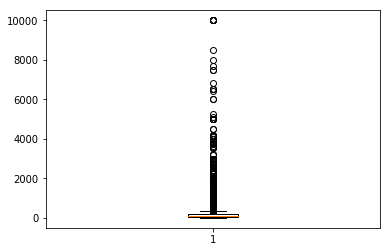

In [7]:
#смотрим на целевую переменную
plt.boxplot(df['price'])

Очень плохой график. 
Большое количество наблюдений находится за пределами 1,5 интерквартильных размаха. Дорогостоящие квартиры могут быть выбросами, но их достаточно много и мы пока не можем их исключить.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BE07337B8>,
      dtype=object)

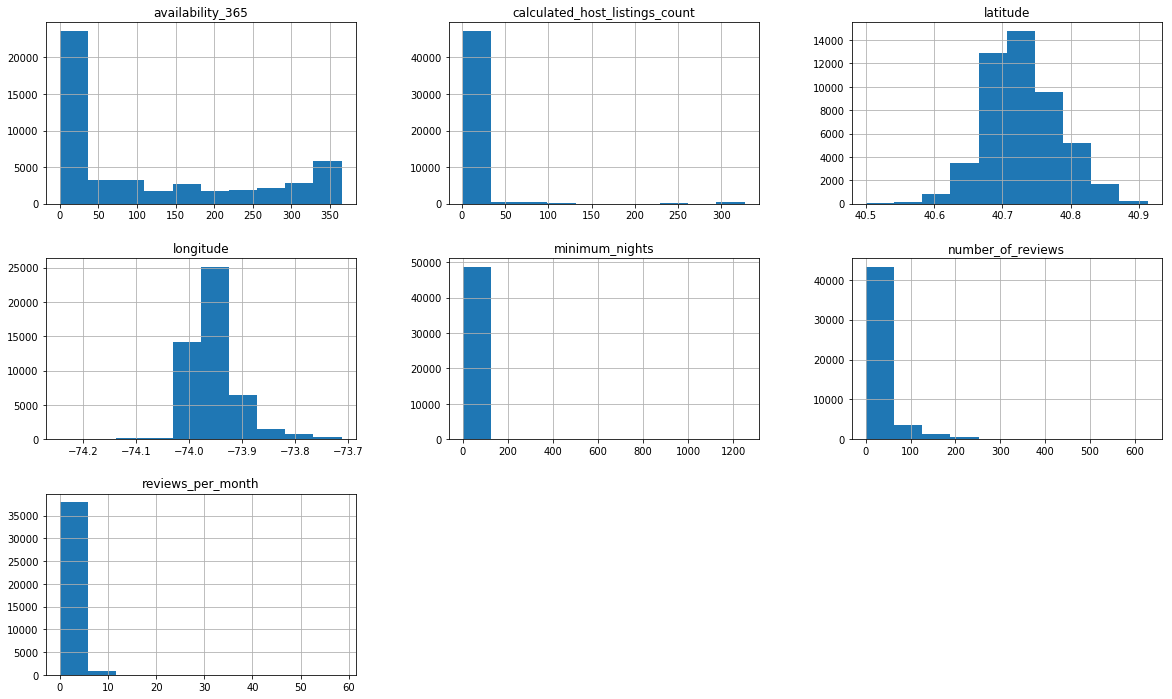

In [8]:
df.drop(['price', 'id', 'host_id', 'last_review'],axis=1).hist(figsize=(20, 12))

In [9]:
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

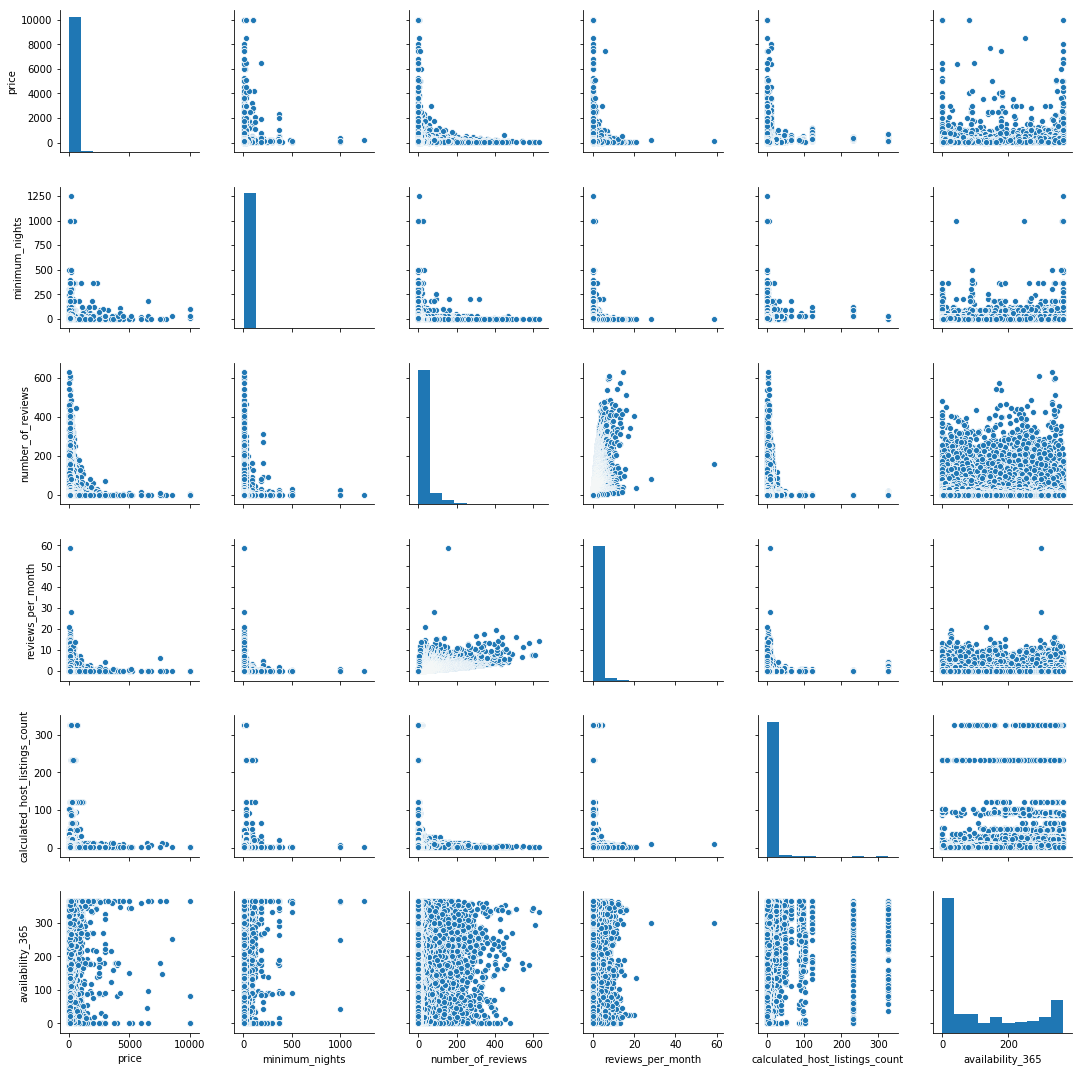

In [10]:
#Переменные, которые пока нужно убрать: id, name, host_id, host_name, last_review.
#pairplot
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

### availability_365

(array([20490.,  1692.,  1414.,  1155.,  1052.,  1097.,  1259.,  1465.,
          521.,   492.,   671.,   544.,   836.,   706.,  1191.,   773.,
          417.,   494.,   592.,   559.,   769.,   641.,   668.,   781.,
          752.,   999.,  1036.,  1278.,  1388.,  3163.]),
 array([  0.        ,  12.16666667,  24.33333333,  36.5       ,
         48.66666667,  60.83333333,  73.        ,  85.16666667,
         97.33333333, 109.5       , 121.66666667, 133.83333333,
        146.        , 158.16666667, 170.33333333, 182.5       ,
        194.66666667, 206.83333333, 219.        , 231.16666667,
        243.33333333, 255.5       , 267.66666667, 279.83333333,
        292.        , 304.16666667, 316.33333333, 328.5       ,
        340.66666667, 352.83333333, 365.        ]),
 <a list of 30 Patch objects>)

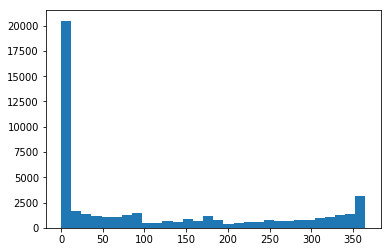

In [11]:
plt.hist(df.availability_365, bins = 30)

In [12]:
df['all_year_avail'] = np.where(df['availability_365']>353, 1, 0)
df['low_avail'] = np.where(df['availability_365']< 12, 1, 0)
df['no_reviews'] = np.where(df['reviews_per_month']==0, 1, 0)
df = df.drop('availability_365', axis=1) 

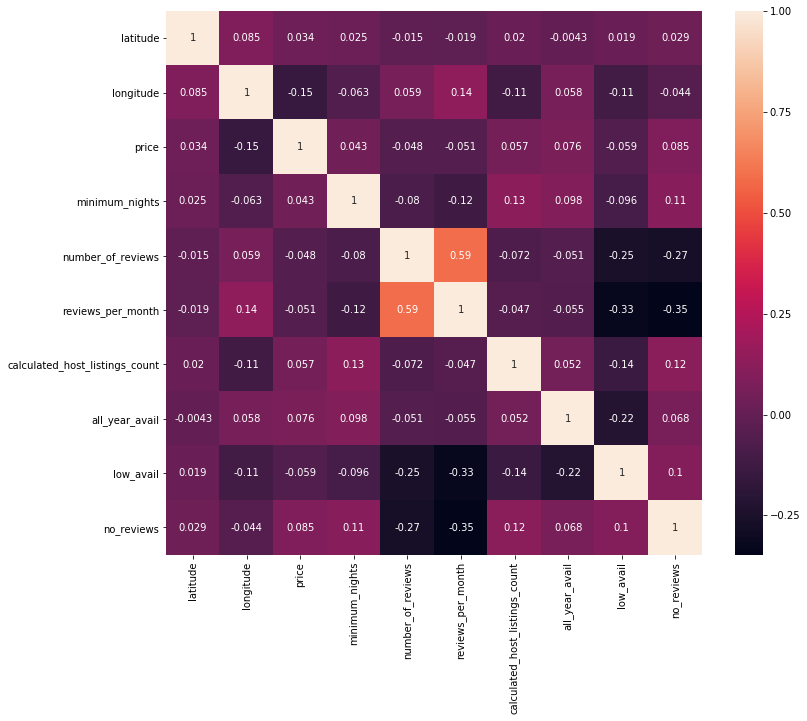

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['id', 'host_id', 'host_name', 'last_review'],axis=1).corr(), annot=True)

## Посмотрим есть ли какие-либо маркеры у элитных апартаментов в поле name

In [14]:
df[:][df.price>3000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,all_year_avail,low_avail,no_reviews
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,0.00,1,0,0,1
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,1,0,0
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,1,0,0
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,0.00,1,0,1,1
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,0.00,1,0,1,1
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,0.00,1,0,1,1
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaN,0.00,1,0,1,1
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,1,0,0
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,1,0,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,1,0,0


Полистав названия дорогих апартаментов нашла примерно следующий список слов, который говорит об их "исключительности": penthouse, lux, luxury, vip, yacht

In [15]:
df.name = df.name.str.lower()
df['luxury_apartments'] = np.where((df.name.str.contains('lux')|
                                 df.name.str.contains('vip')|
                                 df.name.str.contains('yacht')|
                                 df.name.str.contains('penthouse') == True), 1, 0)

In [16]:
df.groupby(by ='luxury_apartments').price.mean()

luxury_apartments
0    145.875252
1    271.046372
Name: price, dtype: float64

Наблюдается корреляция между ценой и longtitude\price. Попробую посмотреть карту 

![](https://ih0.redbubble.net/image.501983027.1585/flat,550x550,075,f.u1.jpg)

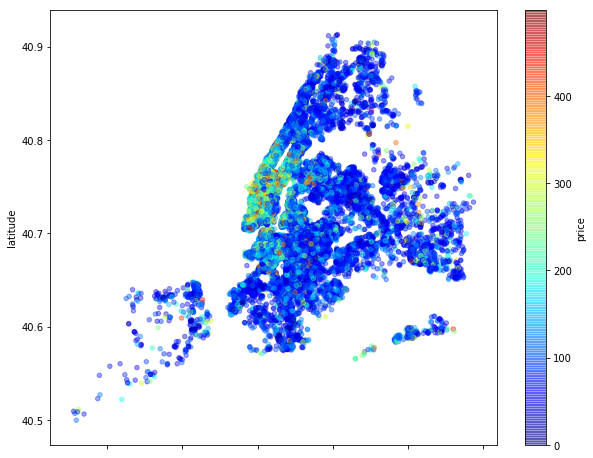

In [17]:
# нашла как сделать карту здесь https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
viz_map_1=df[:][df['price']<500].plot(kind='scatter', x='longitude', y='latitude',  c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))

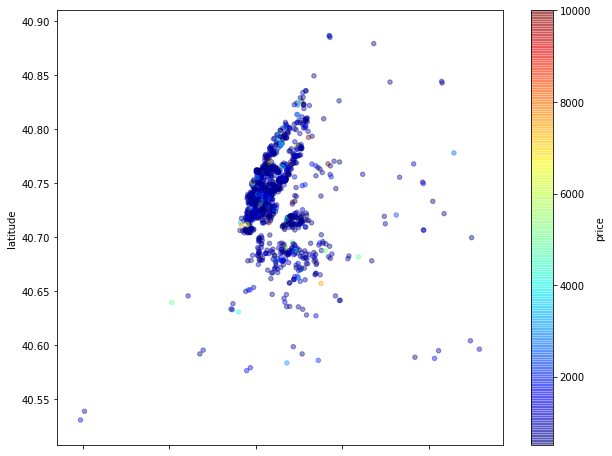

In [18]:
#разброс апартаментов, которые имеют цену выше 500$ - большая их часть находится на Манхэтене
viz_map_outliers=df[:][df['price']>=500].plot(kind='scatter', x='longitude', y='latitude',  c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))

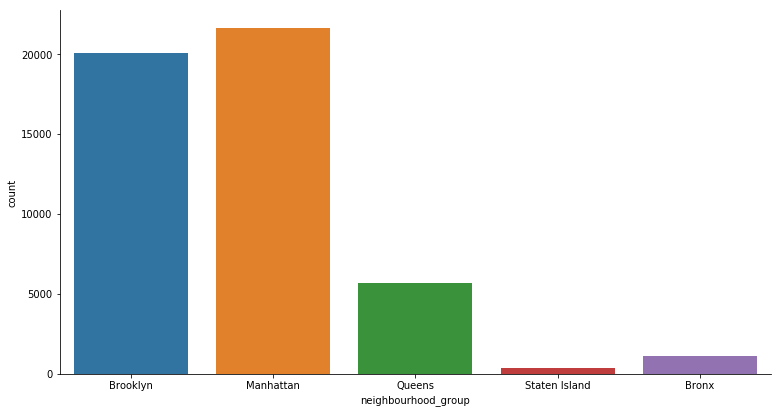

In [19]:
sns.catplot(x='neighbourhood_group', kind='count', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 6)

In [20]:
#Самый дорогой для аренды район - Манхэттен, самы дешевый - Бронкс
df.groupby(by ='neighbourhood_group').price.mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [21]:
#Столбец района содержит более 200 уникальных значений. Не думаю, что имеет смысл брать все из них.
df.groupby(by =['neighbourhood']).price.mean().sort_values()

neighbourhood
Bull's Head            47.333333
Hunts Point            50.500000
Tremont                51.545455
Soundview              53.466667
New Dorp               57.000000
Bronxdale              57.105263
New Dorp Beach         57.400000
Grant City             57.666667
Concord                58.192308
Mount Eden             58.500000
Corona                 59.171875
Woodlawn               60.090909
Castle Hill            63.000000
Borough Park           63.066176
Olinville              64.000000
Woodhaven              67.170455
Arden Heights          67.250000
Emerson Hill           68.200000
Graniteville           68.666667
Parkchester            69.076923
Schuylerville          69.230769
Morris Park            69.333333
Fordham                69.444444
University Heights     69.571429
Silver Lake            70.000000
Highbridge             71.111111
Westerleigh            71.500000
Concourse Village      73.781250
Rossville              75.000000
Fieldston              75.083

Линеаризация целевой переменной модели

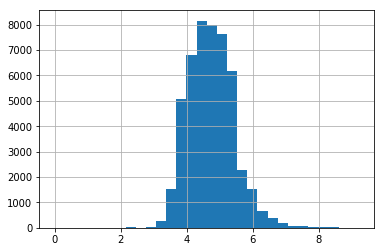

In [22]:
df['price'] = np.log1p(df['price'])
df.price.hist(bins=30)

In [23]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,all_year_avail,low_avail,no_reviews,luxury_apartments
0,2539,clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.010635,1,9,2018-10-19,0.21,6,1,0,0,0
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.420535,1,45,2019-05-21,0.38,2,1,0,0,0
2,3647,the village of harlem....new york !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,5.017280,3,0,NaN,0.00,1,1,0,1,0
3,3831,cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.499810,1,270,2019-07-05,4.64,1,0,0,0,0
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,4.394449,10,9,2018-11-19,0.10,1,0,1,0,0


Координаты Нью-Йорка в десятичных градусах --- нашла данные в сети

    Широта: 40.7142700°
    Долгота: -74.0059700°

Бонусное задание по предобработке - найдите координаты центра Нью-Йорка и при помощи евклидового расстояния создайте новую переменную "center_distance" используя широту и долготу центра и текущей квартиры. Этот признак для линейной регрессии будет работать гораздо лучше, чем просто широта и долгота, так что их можно будет спокойно убрать из датасета.

In [24]:
from math import sqrt
df['center_distance'] = df.apply(lambda row: sqrt((row.longitude + 74.0059700)**2 + (row.latitude - 40.7142700)**2), axis = 1) 

In [25]:
# корреляция совсем выше, чем между price-longitude -0.15
df[['center_distance', 'price']].corr()

,center_distance,price
center_distance,1.000000,-0.357705
price,-0.357705,1.000000


In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'all_year_avail',
       'low_avail', 'no_reviews', 'luxury_apartments', 'center_distance'],
      dtype='object')

In [29]:
numerical_data = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 
        'last_review', 'all_year_avail', 'low_avail', 'no_reviews', 'luxury_apartments'], axis=1)

In [30]:
numerical_data.describe()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,center_distance
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,7.029962,23.274466,1.090910,7.143982,0.077141
std,20.510550,44.550582,1.597283,32.952519,0.047572
min,1.000000,0.000000,0.000000,1.000000,0.000441
25%,1.000000,1.000000,0.040000,1.000000,0.046111
50%,3.000000,5.000000,0.370000,1.000000,0.068835
75%,5.000000,24.000000,1.580000,2.000000,0.099294
max,1250.000000,629.000000,58.500000,327.000000,0.318065


In [31]:
for i in ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']: 
    numerical_data[i] = np.where(numerical_data[i]> 1.5*numerical_data[i].mean(), numerical_data[i].median() , numerical_data[i])

In [32]:
numerical_data.describe()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,center_distance
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,2.738910,6.251559,0.357019,1.654096,0.077141
std,1.717185,7.528386,0.375477,1.462745,0.047572
min,1.000000,0.000000,0.000000,1.000000,0.000441
25%,1.000000,1.000000,0.040000,1.000000,0.046111
50%,3.000000,5.000000,0.370000,1.000000,0.068835
75%,3.000000,7.000000,0.380000,2.000000,0.099294
max,10.000000,34.000000,1.630000,10.000000,0.318065


In [33]:
scaled_numerical_data = (numerical_data - numerical_data.mean())/numerical_data.std()

In [34]:
scaled_numerical_data.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,center_distance
0,-1.012651,0.365077,-0.391551,2.971061,-0.050127
1,-1.012651,-0.166245,0.061206,0.236476,-0.671837
2,0.152045,-0.830398,-0.950839,-0.447170,0.782763
3,-1.012651,-0.166245,0.034573,-0.447170,-0.473298
4,4.228485,0.365077,-0.684511,-0.447170,0.576877


In [36]:
df_categorical = pd.get_dummies(df[['neighbourhood_group', 'room_type', 'all_year_avail', 'low_avail', 'no_reviews', 'luxury_apartments']])

# Объединили назад наши таблички
df_prepared = pd.concat([scaled_numerical_data, df['price'], df_categorical], axis=1)
df_prepared.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,center_distance,price,all_year_avail,low_avail,no_reviews,luxury_apartments,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.012651,0.365077,-0.391551,2.971061,-0.050127,5.010635,1,0,0,0,0,1,0,0,0,0,1,0
1,-1.012651,-0.166245,0.061206,0.236476,-0.671837,5.420535,1,0,0,0,0,0,1,0,0,1,0,0
2,0.152045,-0.830398,-0.950839,-0.447170,0.782763,5.017280,1,0,1,0,0,0,1,0,0,0,1,0
3,-1.012651,-0.166245,0.034573,-0.447170,-0.473298,4.499810,0,0,0,0,0,1,0,0,0,1,0,0
4,4.228485,0.365077,-0.684511,-0.447170,0.576877,4.394449,0,1,0,0,0,0,1,0,0,1,0,0


Во время предобработки не забудьте закодировать категориальные переменные (one-hot encoding, можно использовать pd.get_dummies) и прошкалировать непрерывные.

In [37]:
df_prepared.shape

(48895, 18)

Отложите 30% данных для тестирования и постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV. Измерьте качество каждой и визуализируйте важность признаков. Сделайте интересные выводы :)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prepared.drop(['price'], 
                                                            axis = 1), df_prepared['price'], test_size = 0.3)

## Линейная регрессия

In [39]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [40]:
from sklearn import metrics  # подгружаем метрики

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    pass

In [41]:
print_metrics(y_test,y_pred_regr)

MAE: 64.00702212892809
RMSE: 263.4153910215545
R2: 0.522188791938309


## Лассо регрессия

In [42]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

In [43]:
print_metrics(y_test,y_pred_lasso)

MAE: 86.7302339610435
RMSE: 278.04592561890763
R2: -2.7505508958025615e-05


In [44]:
from sklearn.model_selection import GridSearchCV

# Решетка для перебора параметра 
param_grid = {'alpha': [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso1 = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.0001}


In [45]:
print_metrics(y_test,y_pred_lasso1)

MAE: 63.99659566007837
RMSE: 263.4272868718617
R2: 0.5222611298850972


In [46]:
from sklearn.linear_model import Ridge

# Решётака для перебора параметра 
param_grid = {'alpha': [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1, 2, 3, 5, 10] }

# Объявили модель 
ridge_model = Ridge()

# Объявили перебор 
grid_cv_ridge = GridSearchCV(ridge_model, param_grid, cv = 5)
grid_cv_ridge.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_ridge.best_params_)

# Сделали прогнозы
y_pred_ridge= grid_cv_ridge.predict(X_test)

Лучшее значение параметра: {'alpha': 3}


In [47]:
print_metrics(y_test,y_pred_ridge)

MAE: 64.00487058947222
RMSE: 263.4187242375872
R2: 0.5221947904575944


In [48]:
X_train.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'center_distance', 'all_year_avail',
       'low_avail', 'no_reviews', 'luxury_apartments',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [49]:
featureImportance = pd.DataFrame({"feature": df_prepared.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})
featureImportance.sort_values(by = 'importance').head()

,feature,importance
16,room_type_Shared room,-0.398087
4,center_distance,-0.158623
6,low_avail,-0.147034
13,neighbourhood_group_Staten Island,-0.101146
10,neighbourhood_group_Brooklyn,-0.090344


In [50]:
featureImportance.sort_values(by = 'importance').tail()

,feature,importance
7,no_reviews,0.137040
11,neighbourhood_group_Manhattan,0.189683
5,all_year_avail,0.241815
8,luxury_apartments,0.264266
14,room_type_Entire home/apt,0.733696


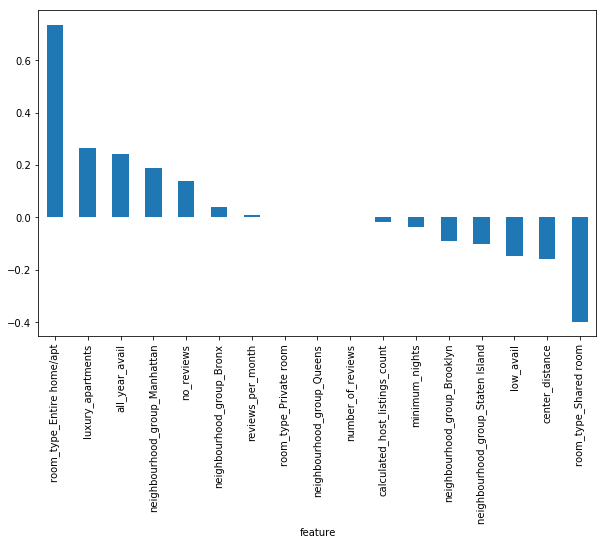

In [51]:
featureImportance = pd.DataFrame({"feature": df_prepared.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [52]:
from sklearn.linear_model import ElasticNet

# Решётака для перебора параметра 
param_grid = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 1, 2, 3, 5, 10] }

# Объявили модель 
elasticnet_model = ElasticNet()

# Объявили перебор 
grid_cv_elasticnet = GridSearchCV(elasticnet_model, param_grid, cv = 5)
grid_cv_elasticnet.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_elasticnet.best_params_)

# Сделали прогнозы
y_pred_elasticnet= grid_cv_elasticnet.predict(X_test)

Лучшее значение параметра: {'alpha': 0.0001}


In [53]:
print_metrics(y_test,y_pred_elasticnet)

MAE: 64.00047126648226
RMSE: 263.4233075230032
R2: 0.5222290233427305


Все модели показали достаточно плохой результат. При медианной цене в 106 долларов мы в среднем можем ошибаться на 215 долларов, делая наше предсказание.

Основные причины: 
    - большое количество выбросов в таргетной переменной;
    - малое количество признаков (возможно, модель была бы гораздо лучше, если бы мы имели такие переменные как класс апартаментов (люкс, эконом, и пр.), информацию о метраже и доп.услугах, информацию о наличии звезд у гостиницы\апартаментов и пр.)
    - возможно что нелинейная модель справится лучше с задачей предсказания здесь, но вероятно ей потребуется большее количество наблюдений :)
    

Класс апартаментов (люкс, эконом, и пр.) - конкретно самодельная переменная luxury_apartments позволила выбить 0.015 в коэф. детерминации. Это говорит о том, что если бы такие данные были - это действительно могло бы оказать положительное влияние на качество нашей модели.